---

Home ownership data:

This notebook contains **Analyze first-time home buyers by CMA**

In this part we will work through the following topics: 

1.	Age of first-time home owners
2.	Type of home for first-time home buyers
3.	Marital stats of first-time home buyers
4.	Location by city of first-time home buyers

In [3]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [4]:
# Let's create a dataframe using the dbFTHB2018.csv file
df_fthb=pd.read_csv('csv/dbFTHB2018.csv',index_col=None)

In [5]:
# We should display the first 5 rows to get a sense of the data
df_fthb.head()

,REF_DATE,GEO,DGUID,Dwelling tenure,Selected housing indicators,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,"Montréal, Quebec",2016S0503462,Owner who is a first-time homebuyer,"Total, structural type of dwelling",Number of households,Number,223,units,0,v1110604520,64.3.1.1,150300.0,B,NaN,NaN,0
1,2018,"Montréal, Quebec",2016S0503462,Owner who is a first-time homebuyer,"Total, structural type of dwelling",Percentage of households,Percent,239,units,0,v1110604523,64.3.1.4,100.0,NaN,NaN,NaN,1
2,2018,"Montréal, Quebec",2016S0503462,Owner who is a first-time homebuyer,Single-detached house,Number of households,Number,223,units,0,v1110604526,64.3.2.1,57200.0,B,NaN,NaN,0
3,2018,"Montréal, Quebec",2016S0503462,Owner who is a first-time homebuyer,Single-detached house,Percentage of households,Percent,239,units,0,v1110604529,64.3.2.4,38.0,NaN,NaN,NaN,1
4,2018,"Montréal, Quebec",2016S0503462,Owner who is a first-time homebuyer,Semi-detached house,Number of households,Number,223,units,0,v1110604532,64.3.3.1,13400.0,D,NaN,NaN,0


In [6]:
df_fthb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_DATE                     912 non-null    int64  
 1   GEO                          912 non-null    object 
 2   DGUID                        912 non-null    object 
 3   Dwelling tenure              912 non-null    object 
 4   Selected housing indicators  912 non-null    object 
 5   Statistics                   912 non-null    object 
 6   UOM                          912 non-null    object 
 7   UOM_ID                       912 non-null    int64  
 8   SCALAR_FACTOR                912 non-null    object 
 9   SCALAR_ID                    912 non-null    int64  
 10  VECTOR                       912 non-null    object 
 11  COORDINATE                   912 non-null    object 
 12  VALUE                        832 non-null    float64
 13  STATUS              

In [7]:
df_fthb.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,912.0,912.00000,912.0,832.000000,0.0,0.0,912.000000
mean,2018.0,231.00000,0.0,35165.031130,NaN,NaN,0.500000
std,0.0,8.00439,0.0,100196.941321,NaN,NaN,0.500274
min,2018.0,223.00000,0.0,0.300000,NaN,NaN,0.000000
25%,2018.0,223.00000,0.0,16.575000,NaN,NaN,0.000000
50%,2018.0,231.00000,0.0,600.000000,NaN,NaN,0.500000
75%,2018.0,239.00000,0.0,25475.000000,NaN,NaN,1.000000
max,2018.0,239.00000,0.0,791900.000000,NaN,NaN,1.000000


In [8]:
# Now let's check if there's any missing data
df_fthb.isnull().sum()

REF_DATE                         0
GEO                              0
DGUID                            0
Dwelling tenure                  0
Selected housing indicators      0
Statistics                       0
UOM                              0
UOM_ID                           0
SCALAR_FACTOR                    0
SCALAR_ID                        0
VECTOR                           0
COORDINATE                       0
VALUE                           80
STATUS                         398
SYMBOL                         912
TERMINATED                     912
DECIMALS                         0
dtype: int64

In [9]:
#Let's check cities
df_fthb.groupby('GEO')['Statistics'].agg(['count', 'size', 'nunique']).stack()

GEO                                     
Calgary, Alberta                 count      152
                                 size       152
                                 nunique      2
Edmonton, Alberta                count      152
                                 size       152
                                 nunique      2
Montréal, Quebec                 count      152
                                 size       152
                                 nunique      2
Ottawa-Gatineau, Ontario/Quebec  count      152
                                 size       152
                                 nunique      2
Toronto, Ontario                 count      152
                                 size       152
                                 nunique      2
Vancouver, British Columbia      count      152
                                 size       152
                                 nunique      2
dtype: int64

In [10]:
df_fthb["GEO"].unique()

array(['Montréal, Quebec', 'Ottawa-Gatineau, Ontario/Quebec',
       'Toronto, Ontario', 'Calgary, Alberta', 'Edmonton, Alberta',
       'Vancouver, British Columbia'], dtype=object)

In [11]:
#Unique values for Dwelling tenure
df_fthb.groupby('Dwelling tenure')['Statistics'].agg(['count', 'size', 'nunique']).stack()

Dwelling tenure                             
Owner who is a first-time homebuyer  count      456
                                     size       456
                                     nunique      2
Renter                               count      456
                                     size       456
                                     nunique      2
dtype: int64

In [12]:
#Unique values for Selected housing indicators
df_fthb["Selected housing indicators"].unique()

array(['Total, structural type of dwelling', 'Single-detached house',
       'Semi-detached house', 'Row house',
       'Apartment or flat in a duplex',
       'Apartment in a building that has five or more storeys',
       'Apartment in a building that has fewer than five storeys',
       'Other single-attached house', 'Moveable dwelling',
       'Total, condominium status', 'Condominium', 'Not condominium',
       'Total, satisfaction with dwelling',
       'Very satisfied with dwelling', 'Satisfied with dwelling',
       'Neither satisfied nor dissatisfied with dwelling',
       'Dissatisfied with dwelling', 'Very dissatisfied with dwelling',
       'Total, satisfaction with neighbourhood',
       'Very satisfied with neighbourhood',
       'Satisfied with neighbourhood',
       'Neither satisfied nor dissatisfied with neighbourhood',
       'Dissatisfied with neighbourhood',
       'Very dissatisfied with neighbourhood',
       'Moved because the household was forced to move by a l

In [13]:
#Dropping the empty columns
df_fthb2 = df_fthb.drop(['SYMBOL', 'TERMINATED'], axis=1)

#Dropping columns that do not contribute information for the analysis
df_fthb2.drop(['REF_DATE','DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 
                              'COORDINATE', 'STATUS', 'DECIMALS'], axis=1, inplace=True)

In [14]:
df_fthb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GEO                          912 non-null    object 
 1   Dwelling tenure              912 non-null    object 
 2   Selected housing indicators  912 non-null    object 
 3   Statistics                   912 non-null    object 
 4   VALUE                        832 non-null    float64
dtypes: float64(1), object(4)
memory usage: 35.8+ KB


In [15]:
#Selecting rows of data which contain information on Toronto, Vancouver, and Calgary markets
df_fthb2 =  df_fthb2.loc[df_fthb2['GEO'].isin(['Toronto, Ontario','Vancouver, British Columbia','Calgary, Alberta'])]
df_fthb2

,GEO,Dwelling tenure,Selected housing indicators,Statistics,VALUE
304,"Toronto, Ontario",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Number of households,208800.0
305,"Toronto, Ontario",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Percentage of households,100.0
306,"Toronto, Ontario",Owner who is a first-time homebuyer,Single-detached house,Number of households,55100.0
307,"Toronto, Ontario",Owner who is a first-time homebuyer,Single-detached house,Percentage of households,26.0
308,"Toronto, Ontario",Owner who is a first-time homebuyer,Semi-detached house,Number of households,21500.0
...,...,...,...,...,...
907,"Vancouver, British Columbia",Renter,Moved for personal health reasons,Percentage of households,5.8
908,"Vancouver, British Columbia",Renter,Moved to become a homeowner,Number of households,5400.0
909,"Vancouver, British Columbia",Renter,Moved to become a homeowner,Percentage of households,1.4
910,"Vancouver, British Columbia",Renter,Moved for another reason,Number of households,6400.0


In [56]:
#rename columns
df_fthb2 = df_fthb2.rename(columns={"GEO": "City", "Dwelling tenure": "Tenure", "Selected housing indicators": "Indicator", "VALUE": "Value"})
df_fthb2

,City,Tenure,Indicator,Statistics,Value
304,"Toronto, Ontario",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Number of households,208800.0
305,"Toronto, Ontario",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Percentage of households,100.0
306,"Toronto, Ontario",Owner who is a first-time homebuyer,Single-detached house,Number of households,55100.0
307,"Toronto, Ontario",Owner who is a first-time homebuyer,Single-detached house,Percentage of households,26.0
308,"Toronto, Ontario",Owner who is a first-time homebuyer,Semi-detached house,Number of households,21500.0
...,...,...,...,...,...
907,"Vancouver, British Columbia",Renter,Moved for personal health reasons,Percentage of households,5.8
908,"Vancouver, British Columbia",Renter,Moved to become a homeowner,Number of households,5400.0
909,"Vancouver, British Columbia",Renter,Moved to become a homeowner,Percentage of households,1.4
910,"Vancouver, British Columbia",Renter,Moved for another reason,Number of households,6400.0


In [69]:
df_profile_movedto =  df_fthb2.loc[df_fthb2['Tenure'].isin(['Owner who is a first-time homebuyer'])]
df_profile_movedto

,City,Tenure,Indicator,Statistics,Value
304,"Toronto, Ontario",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Number of households,208800.0
305,"Toronto, Ontario",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Percentage of households,100.0
306,"Toronto, Ontario",Owner who is a first-time homebuyer,Single-detached house,Number of households,55100.0
307,"Toronto, Ontario",Owner who is a first-time homebuyer,Single-detached house,Percentage of households,26.0
308,"Toronto, Ontario",Owner who is a first-time homebuyer,Semi-detached house,Number of households,21500.0
...,...,...,...,...,...
831,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved for personal health reasons,Percentage of households,2.1
832,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved to become a homeowner,Number of households,54600.0
833,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved to become a homeowner,Percentage of households,57.0
834,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved for another reason,Number of households,800.0


In [70]:
df_profile_movedto =  df_profile_movedto.loc[df_fthb2['Statistics'].isin(['Percentage of households'])]
df_profile_MovedTo = df_profile_movedto.dropna()
df_profile_movedto

,City,Tenure,Indicator,Statistics,Value
305,"Toronto, Ontario",Owner who is a first-time homebuyer,"Total, structural type of dwelling",Percentage of households,100.0
307,"Toronto, Ontario",Owner who is a first-time homebuyer,Single-detached house,Percentage of households,26.0
309,"Toronto, Ontario",Owner who is a first-time homebuyer,Semi-detached house,Percentage of households,10.3
311,"Toronto, Ontario",Owner who is a first-time homebuyer,Row house,Percentage of households,8.6
313,"Toronto, Ontario",Owner who is a first-time homebuyer,Apartment or flat in a duplex,Percentage of households,1.6
...,...,...,...,...,...
827,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved to reduce housing costs,Percentage of households,5.2
829,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved to be in a more desirable neighbourhood,Percentage of households,16.6
831,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved for personal health reasons,Percentage of households,2.1
833,"Vancouver, British Columbia",Owner who is a first-time homebuyer,Moved to become a homeowner,Percentage of households,57.0


In [75]:
df_profile_movedto =  df_profile_movedto.loc[df_profile_movedto['Indicator'].isin([
    'Moved because of a change in household or family size',
    'Moved because the household was forced to move by a landlord, a bank or other financial institution or the government',
    'Moved for a new job or job transfer',
    'Moved for a new school',
    'Moved for personal health reasons',
    'Moved to be closer to family',
    'Moved to be in a more desirable neighbourhood',
    'Moved to become a homeowner',
    'Moved to form own household',
    'Moved to reduce commuting time',
    'Moved to reduce housing costs',
    'Moved to upgrade to a larger dwelling or better quality dwelling'])]
df_profile_movedto

,City,Tenure,Indicator,Statistics,Value
353,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved because the household was forced to move...,Percentage of households,5.2
357,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved for a new job or job transfer,Percentage of households,7.4
359,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved for a new school,Percentage of households,4.0
361,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved to form own household,Percentage of households,22.0
363,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved to be closer to family,Percentage of households,3.6
365,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved because of a change in household or fami...,Percentage of households,8.4
367,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved to reduce commuting time,Percentage of households,7.6
369,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved to upgrade to a larger dwelling or bette...,Percentage of households,23.0
371,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved to reduce housing costs,Percentage of households,7.7
373,"Toronto, Ontario",Owner who is a first-time homebuyer,Moved to be in a more desirable neighbourhood,Percentage of households,13.3


In [105]:
percentaje_house_holds_analysis = pd.crosstab(df_profile_movedto['Indicator']
                                             ,df_profile_movedto['Tenure']
                                             ,df_profile_movedto['Value'],aggfunc='mean').round(1)
percentaje_house_holds_analysis

Tenure,Owner who is a first-time homebuyer
Indicator,
Moved because of a change in household or family size,12.6
"Moved because the household was forced to move by a landlord, a bank or other financial institution or the government",4.6
Moved for a new job or job transfer,7.0
Moved for a new school,3.1
Moved for personal health reasons,2.1
Moved to be closer to family,4.2
Moved to be in a more desirable neighbourhood,18.3
Moved to become a homeowner,67.7
Moved to form own household,22.3


In [ ]:
#Let's try to visualize some of these 

Text(0.5, 1.0, 'Reasons first-time homebuyers moved')

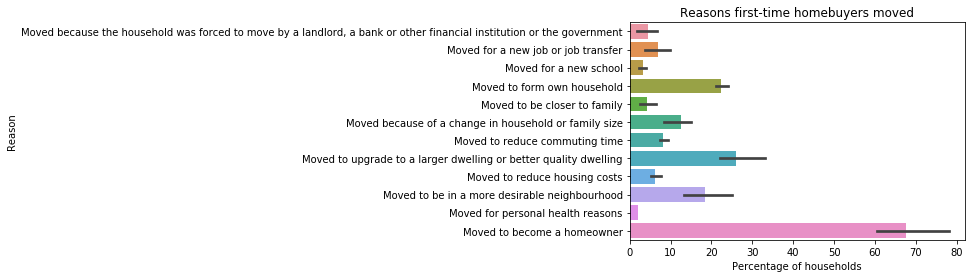

In [129]:
ax = sns.barplot(x='Value', y='Indicator', data=df_profile_movedto)
ax.set_xlabel('Percentage of households')
ax.set_ylabel('Reason')
ax.set_title('Reasons first-time homebuyers moved')

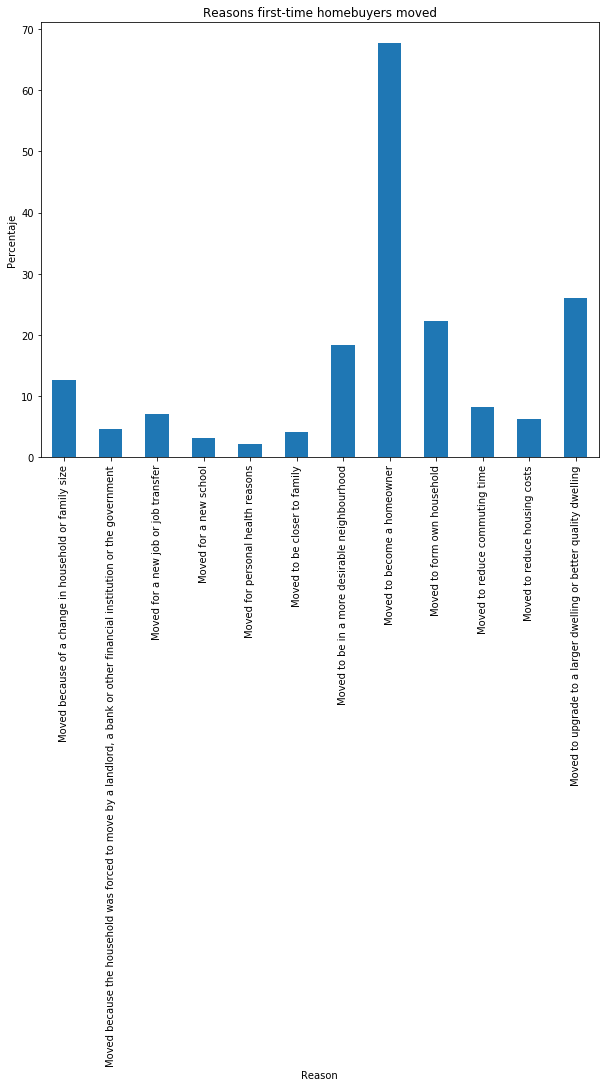

In [95]:

ax_households = percentaje_house_holds_analysis.plot(kind='bar', 
                                                     #width, color = 'gray', alpha = 0.7, 
                                                     legend = False, figsize=(10,8))
ax_households.set(title = 'Reasons first-time homebuyers moved', ylabel = 'Percentaje', xlabel = "Reason")
plt.show();

In [131]:
#We can use the crosstab function to pivot Selected housing indicators and Dwelling tenure
Housing_Indicator_Analysis = pd.crosstab(df_fthb2['Indicator'],df_fthb2['Tenure'],df_fthb2['Value'],aggfunc='mean').round(1)
Housing_Indicator_Analysis

Tenure,Owner who is a first-time homebuyer,Renter
Indicator,,
Apartment in a building that has fewer than five storeys,9009.0,58915.8
Apartment in a building that has five or more storeys,17794.1,100684.5
Apartment or flat in a duplex,1084.2,12453.3
Condominium,30089.7,46428.6
Dissatisfied with dwelling,2262.8,21971.4
Dissatisfied with neighbourhood,1768.1,13186.2
Moveable dwelling,NaN,700.0
Moved because of a change in household or family size,6939.6,40692.2
"Moved because the household was forced to move by a landlord, a bank or other financial institution or the government",3069.0,24689.4


In [133]:
#Fill NA/NaN values with 0. Keep in mind that unit of the missing values is percentaje
#df_fthb2['VALUE'].fillna(0, inplace = True)

#Let's drop the rows where VALUE is missing
df_fthb2.dropna(subset=['Value'], inplace=True)
df_fthb2.isnull().sum()

City          0
Tenure        0
Indicator     0
Statistics    0
Value         0
dtype: int64

In [134]:
#Okay. Let's do some analysis on the percentaje of households for first-time home buyers (FTHB)
percentaje_analysis = pd.crosstab(df_fthb2['Tenure'],df_fthb2['City'],df_fthb2['Value'],aggfunc='mean').round(1)
percentaje_analysis 

City,"Calgary, Alberta","Toronto, Ontario","Vancouver, British Columbia"
Tenure,,,
Owner who is a first-time homebuyer,10353.1,30605.5,13421.4
Renter,18422.5,99821.1,47662.7


In [135]:
#Let's pull some basic stats for the percentaje of households, incl the mean, standard deviation, and distribution of data
df_fthb2.describe()

,Value
count,420.000000
mean,37558.916429
std,101072.801029
min,0.300000
25%,16.925000
50%,600.000000
75%,28100.000000
max,776100.000000


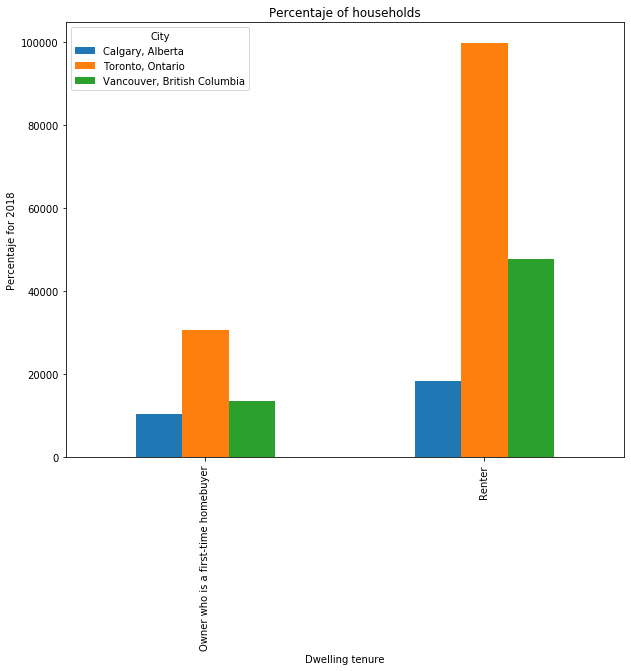

In [136]:
#We can see that ...
#Let's try to visualize some of these insights
ax_provinces = percentaje_analysis[['Calgary, Alberta', 'Toronto, Ontario', 
                                    'Vancouver, British Columbia']].plot(kind='bar', 
                                                                         legend = True, figsize=(10,8))
ax_provinces.set(title = 'Percentaje of households',
       ylabel = 'Percentaje for 2018', xlabel = "Dwelling tenure")
plt.show();